<div align='center'><font size="7" color="#F39C12">Medical Appointment No Show</font></div>
<hr>


<div align='left'><font size="5" color="#F39C12">A general Introduction</font></div>
If you have any symptom on your body people want to visit hospital and talk with dochter.But they need a appointment to meet doctor. However according to the US Study is found that up tp 30% of patients miss their appointments, and $150 billion is lost every year 

**Reference: [US Study](https://www.scisolutions.com/uploads/news/Missed-Appts-Cost-HMT-Article-042617.pdf)**

<div align='left'><font size="6" color="#F39C12">check list</font></div>

**Notice** : check the information about dataset, especially column data.You can check out the data from kaggle : [Original dataset](https://www.kaggle.com/joniarroba/noshowappointments)

Strongly recommended to read out what is this dataset about and the meaning of each columns

- Summary of columns data
  1. PatientId : Identification of a patient 
  2. AppointmentID : Identification of each appointment
  3. Gender : Male or Female
  4. ScheduledDay : The day of the actuall appointment, when they have to visit the doctor.
  5. AppointmentDay : The day someone called or registered the appointment, this is before appointment of course.
  6. Age : How old is patient  
  7. Neighbourhood : Where the appointment takes place.
  8. Scholarship : True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
  9. Hipertension : True or False
  10. Diabetes: True or False 
  11. Alcoholism : True or False
  12. Handcap : True or False
  13. SMS_received : 1 or more messages sent to the patient.
  14. No-show : True or False 



<div align='left'><font size="6" color="#F39C12">Structure</font></div>
<hr>

- **[1. Importing the prerequisite libraries](#imports)**
- **[2. load the dataset](#loading)**
- **[3. Data cleaning](#AC)**
- **[4. Exploratory Data Analysis](#eda)**

# <a name="imports"></a> 1. Importing the prerequisite libraries

In [1]:
import pandas as pd
# pandas = excel in python

import numpy as np
# numpy = mathe in python

import matplotlib.pyplot as plt
import seaborn as sns 
# visualization libraries

import datetime
# date library

import warnings
warnings.filterwarnings('ignore')
# ignore warning signal 

# <a name="loading"></a> 2. load the dataset

## 2.1 read dataset

In [2]:
df=pd.read_csv('NoshowAppointment.csv')

## 2.2 Head & Tail of dataset

In [3]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


# <a name="AC"></a> 3. Data cleaning & Feature engineering 

### 3.1 Misssing value

In [4]:
df.isnull().any().any()
# No missing value

False

### 3.2 Duplication 

In [5]:
df.duplicated().sum()
# No duplication 

0

### 3.3 Incorrect datatype

In [6]:
df.info()
# wrong type of data: ScheduledDay,AppointmentDay

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
## Converting the date information in string to datetime type:
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay)
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay)

### 3.4 change the column name

 - Hipertension is spanisch -> in english called **Hypertension**
 - Handcap -> **Handicap**
 

In [8]:
df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace = True)

### 3.5 Statistical Error

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


 > Negative age value -> wrong

In [10]:
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
df.drop([99832],inplace=True)

### 3.6 Age of Infant

In [12]:
df[df['Age']==0].shape

(3539, 14)

In [13]:
df[(df.Age <= 0) & ((df.Hypertension.astype(int) == 1) | (df.Diabetes.astype(int) == 1) | (df.Alcoholism.astype(int) == 1))]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show


Observation 

> There 3539 patients who are 0 years old.These are small infant with few months of Age. In the normal case they don't have `Diabetes`,`Hipertension` and `Alcoholism`. And then we check that these are infant.(No case of Infant with `Diabetes`,`Hipertension` or `Alcoholism`)

### 3.7 Unique value of Neighborhood

In [14]:
print("Unique Values of `Neighbourhood`:{}"
      .format(np.sort(df.Neighbourhood.unique())))

Unique Values of `Neighbourhood`:['AEROPORTO' 'ANDORINHAS' 'ANTÔNIO HONÓRIO' 'ARIOVALDO FAVALESSA'
 'BARRO VERMELHO' 'BELA VISTA' 'BENTO FERREIRA' 'BOA VISTA' 'BONFIM'
 'CARATOÍRA' 'CENTRO' 'COMDUSA' 'CONQUISTA' 'CONSOLAÇÃO' 'CRUZAMENTO'
 'DA PENHA' 'DE LOURDES' 'DO CABRAL' 'DO MOSCOSO' 'DO QUADRO'
 'ENSEADA DO SUÁ' 'ESTRELINHA' 'FONTE GRANDE' 'FORTE SÃO JOÃO' 'FRADINHOS'
 'GOIABEIRAS' 'GRANDE VITÓRIA' 'GURIGICA' 'HORTO' 'ILHA DAS CAIEIRAS'
 'ILHA DE SANTA MARIA' 'ILHA DO BOI' 'ILHA DO FRADE' 'ILHA DO PRÍNCIPE'
 'ILHAS OCEÂNICAS DE TRINDADE' 'INHANGUETÁ' 'ITARARÉ' 'JABOUR'
 'JARDIM CAMBURI' 'JARDIM DA PENHA' 'JESUS DE NAZARETH' 'JOANA D´ARC'
 'JUCUTUQUARA' 'MARIA ORTIZ' 'MARUÍPE' 'MATA DA PRAIA' 'MONTE BELO'
 'MORADA DE CAMBURI' 'MÁRIO CYPRESTE' 'NAZARETH' 'NOVA PALESTINA'
 'PARQUE INDUSTRIAL' 'PARQUE MOSCOSO' 'PIEDADE' 'PONTAL DE CAMBURI'
 'PRAIA DO CANTO' 'PRAIA DO SUÁ' 'REDENÇÃO' 'REPÚBLICA' 'RESISTÊNCIA'
 'ROMÃO' 'SANTA CECÍLIA' 'SANTA CLARA' 'SANTA HELENA' 'SANTA LUÍZA'
 'SANTA LÚ

### 3.8 Waiting Time

In [15]:
#df['AppointmentDay'] = np.where((df['AppointmentDay'] - df['ScheduledDay']).dt.days < 0, df['ScheduledDay'], df['AppointmentDay'])

# Get the Waiting Time in Days of the Patients.
df['Waiting_Time_days'] = df['AppointmentDay'] - df['ScheduledDay']
df['Waiting_Time_days'] = df['Waiting_Time_days'].dt.days

**Notice**

There are exceptions that waiting times are negative.That mean scheduledDay was earlier than Appointment day.We need to remove it

In [16]:
Negative = df[df['Waiting_Time_days'] < 0].index
df.drop(Negative, inplace=True)

### 3.9 Split show vs Noshow

In [17]:
df2 = df[df['No-show']=='Yes']
df2.to_csv('only_Noshow.csv',index=False)

# <a name="eda"></a> 4. Exploratory Data Analysis

### 4.1 No Show vs Show with pie-chart 

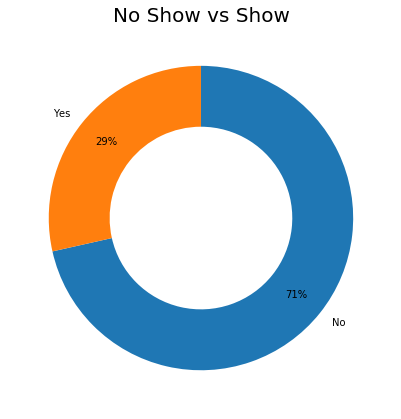

In [18]:
plt.figure(figsize=(17,7)) 
sorted_counts = df['No-show'].value_counts()
ax=plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,pctdistance=0.8 ,wedgeprops = {'width' : 0.4}, autopct='%1.0f%%');

plt.title('No Show vs Show',fontsize=20);

Observation 

> No Show: 20%  vs  Show: 80%

### 4.2 Gender Comparision only with no show

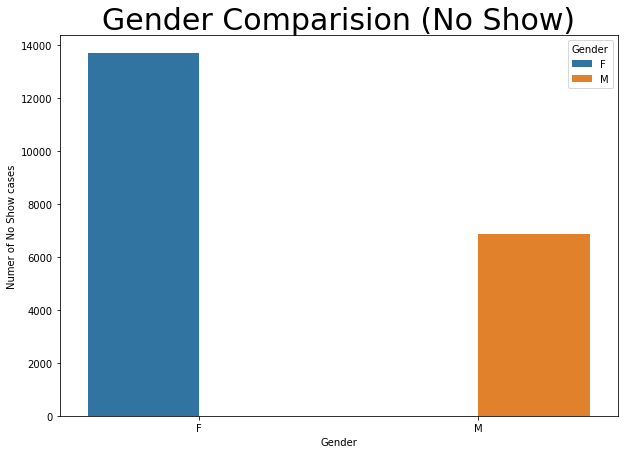

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(x='Gender',data=df2,hue='Gender')
plt.title("Gender comparision (No Show)".title(),fontsize=30)
plt.ylabel('Numer of No Show cases');

Observation 

> Female > Male 

### 4.3 No show rate of differrent gender

In [20]:
df.groupby(['Gender','No-show'])['No-show'].count()

Gender  No-show
F       No         34396
        Yes        13674
M       No         17041
        Yes         6848
Name: No-show, dtype: int64

In [21]:
a = (df.groupby(['Gender','No-show'])['No-show'].count()[1] / sum(df.groupby(['Gender','No-show'])['No-show'].count()[0:2]))
print("The rate of female's no show is "+"{:.2f}".format(a*100)+'%')
b = (df.groupby(['Gender','No-show'])['No-show'].count()[3] / sum(df.groupby(['Gender','No-show'])['No-show'].count()[2:4]))
print("The rate of male's no show is "+"{:.2f}".format(b*100)+'%')

The rate of female's no show is 28.45%
The rate of male's no show is 28.67%


Observation

> Gender is not a important fator of No show appointment.Because the rate of different gender shows very similar values.

### 4.4 Age histogram

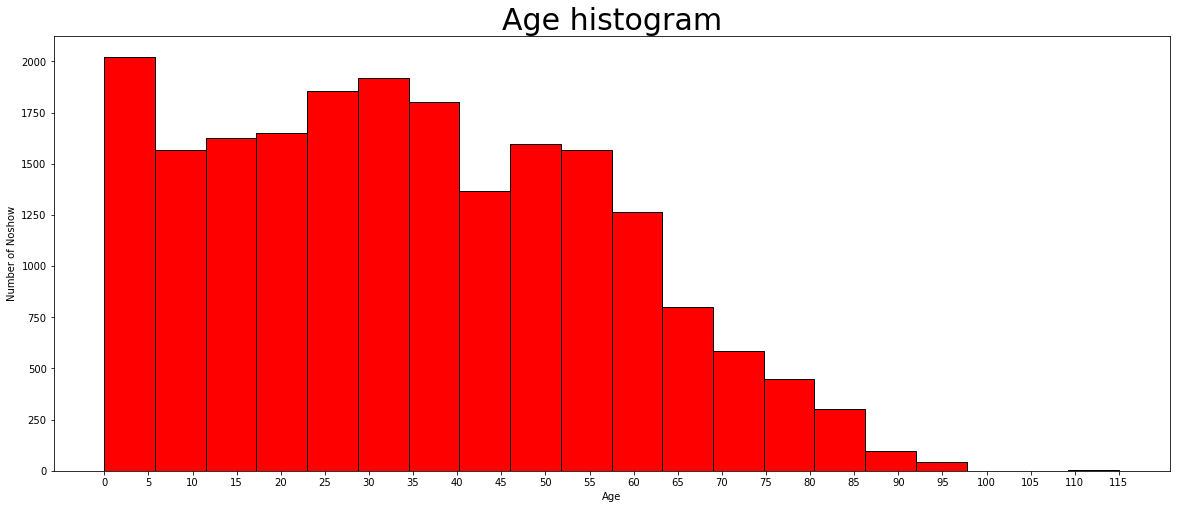

In [22]:
plt.subplots(figsize=(20,8))
plt.hist(x='Age',bins=20,data=df2,edgecolor='black',color='red')
plt.title('Age histogram',fontsize=30)
plt.xlabel('Age')
plt.ylabel('Number of Noshow')
x1 = list(range(0,120,5))
plt.xticks(x1);

Observation 

> Age interval from 0 to 5 shows the highst number of no show cases.This is because of parent.Age from 0 to 5 can't visit hospital without next of kin(NOK)

### 4.5 Age histogram with different Gender

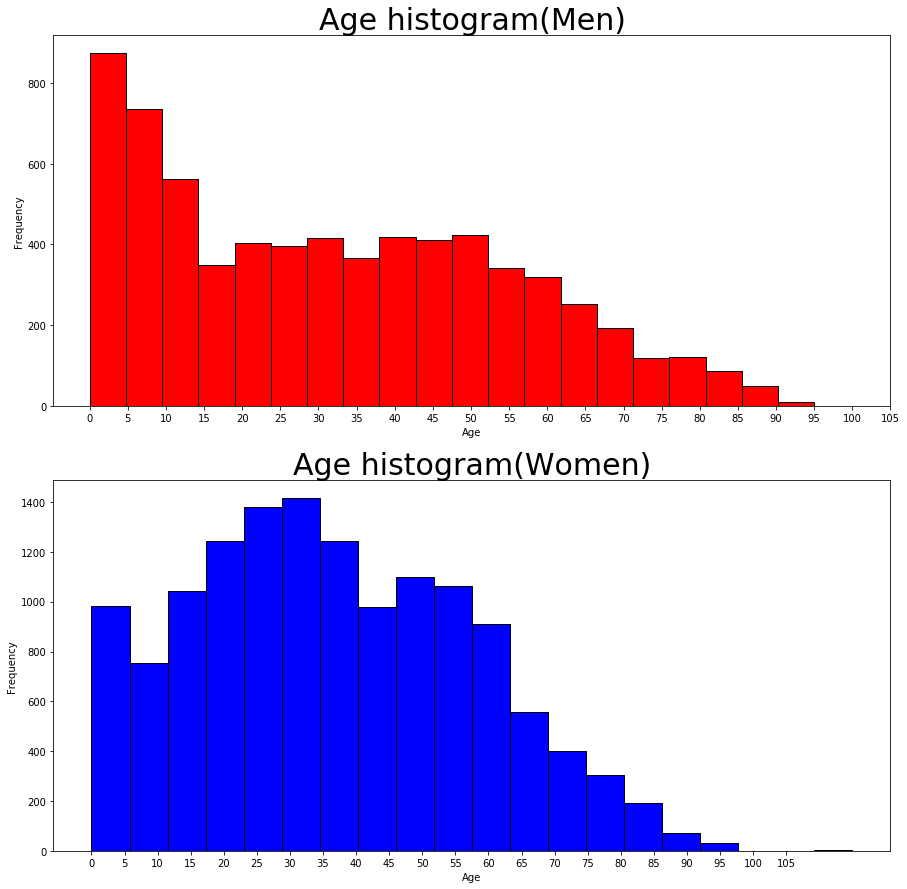

In [23]:
f,ax=plt.subplots(2,1,figsize=(15,15))
df2[df2['Gender']=='M'].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Age histogram(Men)',fontsize=30)
ax[0].set_xlabel('Age')
x1=list(range(0,110,5))
ax[0].set_xticks(x1)
df2[df2['Gender']=='F'].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='blue')
ax[1].set_title('Age histogram(Women)',fontsize=30)
ax[1].set_xlabel('Age')
x2=list(range(0,110,5))
ax[1].set_xticks(x2);

Observation 

> both histograms show right skewed distribution

### 4.6 No Show with Time 

In [24]:
df2['Hour'] = pd.to_datetime(df2['ScheduledDay']).dt.hour
df2['Minute'] = pd.to_datetime(df2['ScheduledDay']).dt.minute
df2['Second'] = pd.to_datetime(df2['ScheduledDay']).dt.second
df2['Count'] = 1
df2.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Waiting_Time_days,Hour,Minute,Second,Count
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1,15,5,12,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1,15,39,58,1
11,7.542951e+12,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,2,8,44,12,1
17,1.479497e+13,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes,0,9,28,57,1
20,6.222575e+14,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,1,7,51,14,1


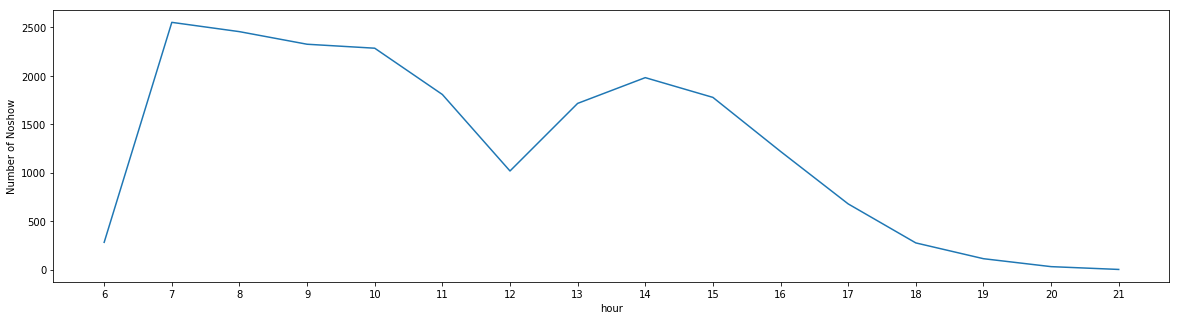

In [25]:
keys = [pair for pair, df2 in df2.groupby(['Hour'])]

plt.figure(figsize=(20,5))
plt.plot(keys, df2.groupby(['Hour']).count()['Count'])
plt.xlabel('hour')
plt.ylabel('Number of Noshow')
plt.xticks(keys);

Observation 

> High no show cases in the morning (7am to 10am). Probably because of the morning they want to sleep more rather show up appointment

### 4.7 Noshow with Receiving SMS

In [28]:
No_show_Adult = df2[df2['Age']>=18]

Considering the Age over 18. Assumed not all minor have a cell phone.So it's not considered in this visualization.

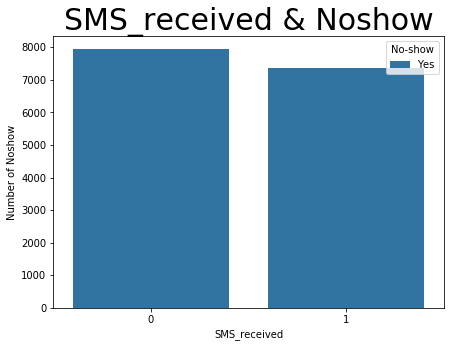

In [29]:
plt.figure(figsize=(7,5))
sns.countplot(x='SMS_received',hue='No-show',data=No_show_Adult)
plt.title("SMS_received & Noshow",fontsize=30)
plt.ylabel('Number of Noshow');

Observation

> Receiving SMS is not a crucial factor of determininig No-show. As you can see above there are a lot of cases that they didn't show up their medical appointment even they received a message from hospital or doctor.

### 4.8 No show with Neighborhood 

#### 4.8.1 No show counting with Neighbourhood

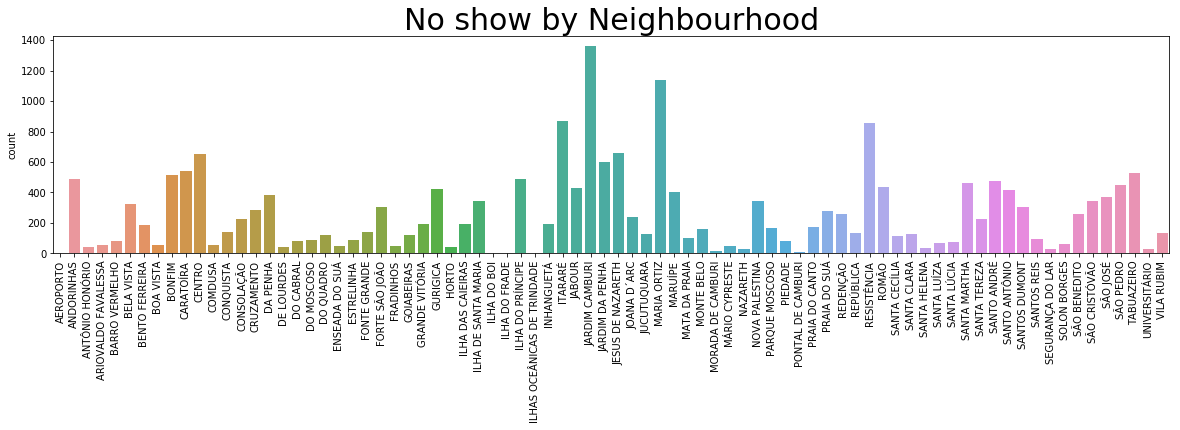

In [30]:
plt.figure(figsize=(20,4))
plt.xticks(rotation='vertical')
ax = sns.countplot(x=np.sort(df2.Neighbourhood))
ax.set_title("No show by Neighbourhood",fontsize=30);

#### 4.8.2 No show rate with Neighbourhood

In [31]:
 RateNeighbourhood = df[df['No-show']=='No'].groupby(['Neighbourhood']).size() / df.groupby(['Neighbourhood']).size() 

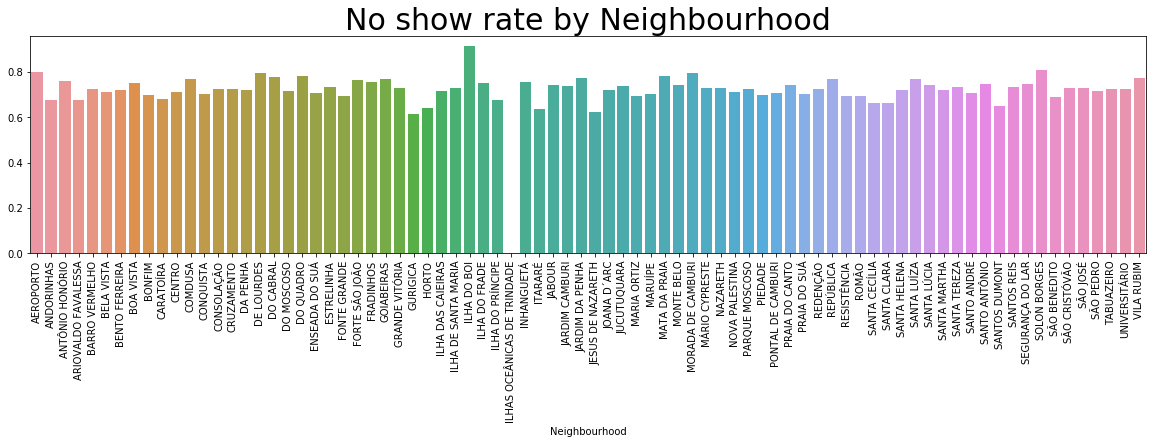

In [32]:
plt.figure(figsize=(20,4))
plt.xticks(rotation='vertical')
sns.barplot(x=RateNeighbourhood.index,y=RateNeighbourhood)
plt.title("No show rate by Neighbourhood",fontsize=30);

Observation 

> Rate of No show by neighbourhood are almost same.

### 4.9 No show with Hypertension

#### 4.9.1 No show counting by Hypertension

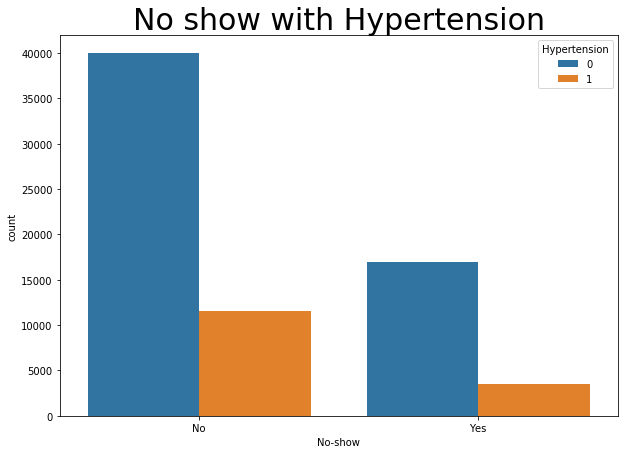

In [33]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='No-show',hue='Hypertension')
plt.title("No show with Hypertension",fontsize=30);

#### 4.9.2 No show rate with Hypertension

In [34]:
 RateHypertension = df[df['No-show']=='No'].groupby(['Hypertension']).size() / df.groupby(['Hypertension']).size() 

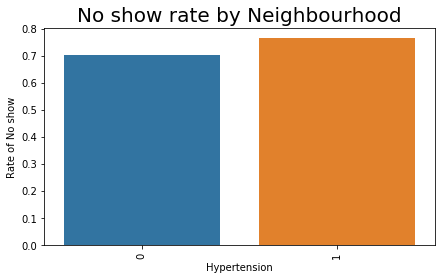

In [35]:
plt.figure(figsize=(7,4))
plt.xticks(rotation='vertical')
sns.barplot(x=RateHypertension.index,y=RateHypertension)

plt.title("No show rate by Neighbourhood",fontsize=20)
plt.ylabel("Rate of No show");

### 4.10 No show with Handicap 

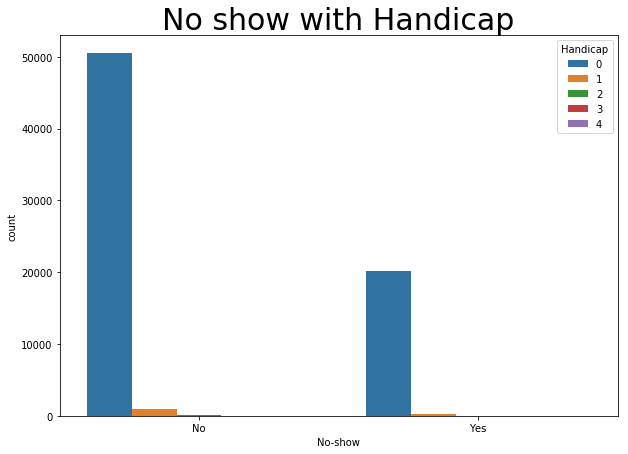

In [36]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='No-show',hue='Handicap')
plt.title("No show with Handicap",fontsize=30);

In [37]:
 RateHandicap = df[df['No-show']=='No'].groupby(['Handicap']).size() / df.groupby(['Handicap']).size() 

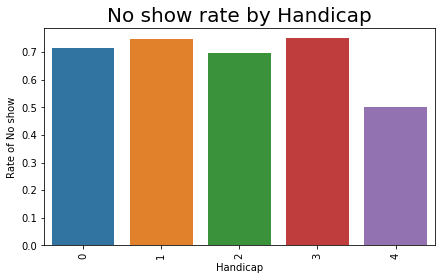

In [38]:
plt.figure(figsize=(7,4))
plt.xticks(rotation='vertical')
sns.barplot(x=RateHandicap.index,y=RateHandicap)
plt.title("No show rate by Handicap",fontsize=20)
plt.ylabel("Rate of No show");

### 4.12 No show with Waiting Time days

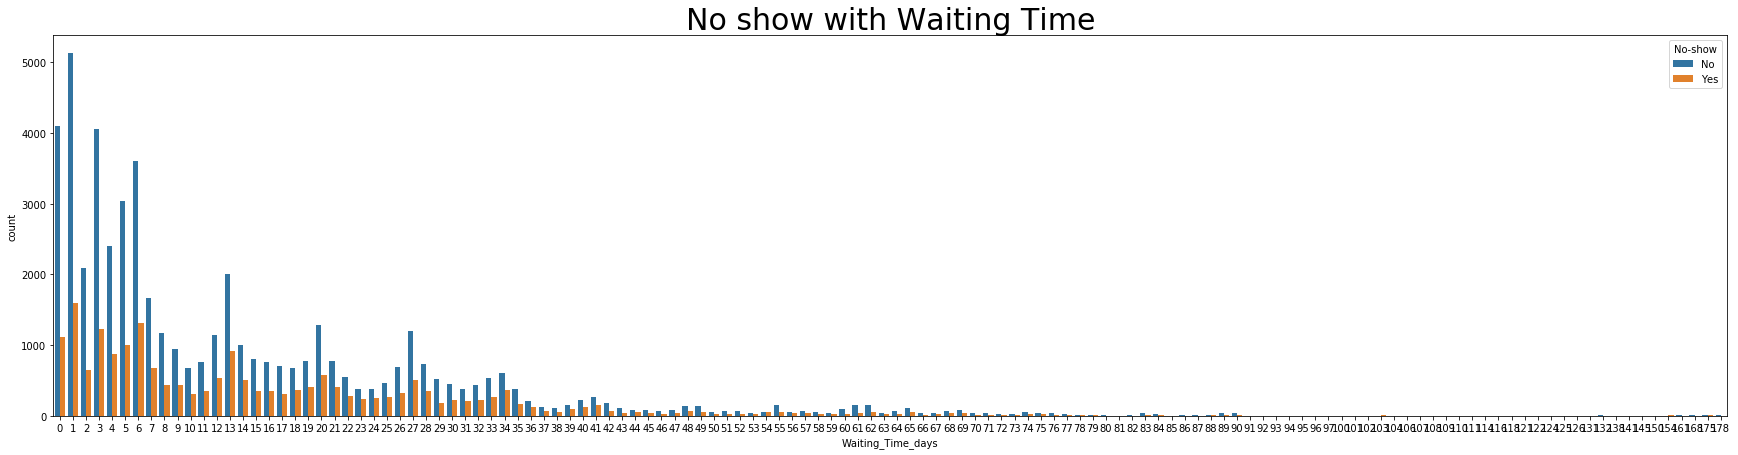

In [39]:
plt.figure(figsize=(30,7))
sns.countplot(data=df,x='Waiting_Time_days',hue='No-show')
plt.title("No show with Waiting Time",fontsize=30);

In [40]:
 RateWaitingTimeDay = df[df['No-show']=='No'].groupby(['Waiting_Time_days']).size() / df.groupby(['Waiting_Time_days']).size() 

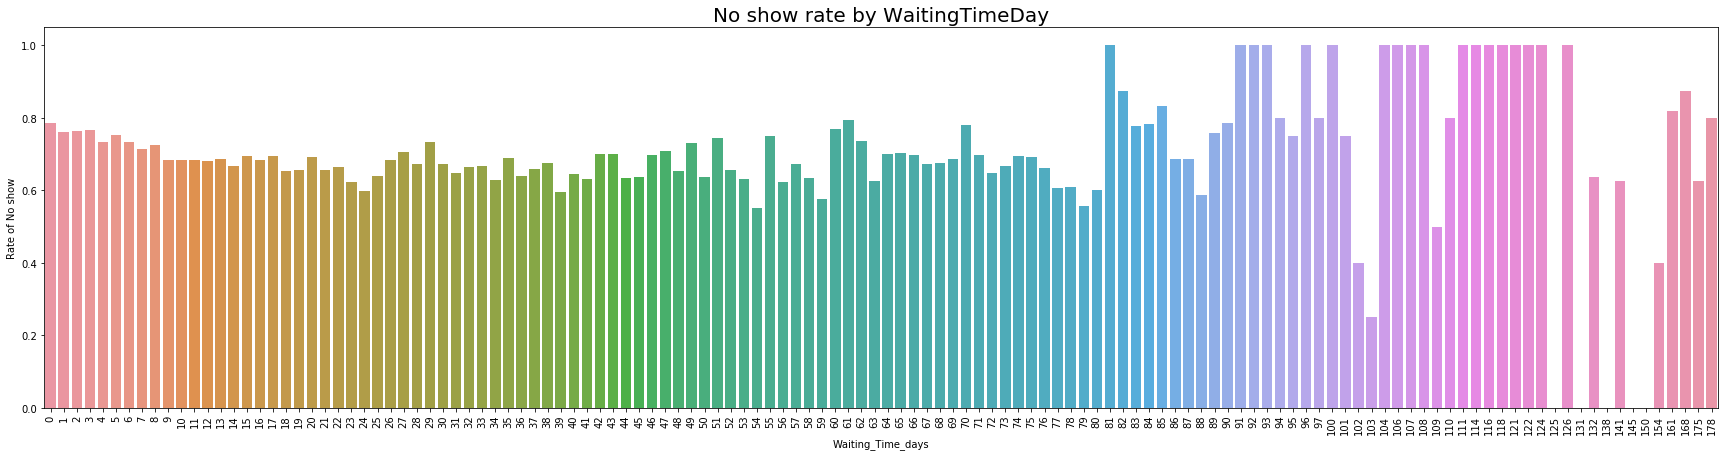

In [41]:
plt.figure(figsize=(30,7))
plt.xticks(rotation='vertical')
sns.barplot(x=RateWaitingTimeDay.index,y=RateWaitingTimeDay)
plt.title("No show rate by WaitingTimeDay",fontsize=20)
plt.ylabel("Rate of No show");

### 4.12 Correlation matrix of factors 

In [42]:
df.replace({'Yes':1, 'No': 0},inplace=True)
# In order to get a correation in number we need to conver into numeric value

In [43]:
c= df.corr()
mask = np.triu(np.ones_like(c, dtype=np.bool))

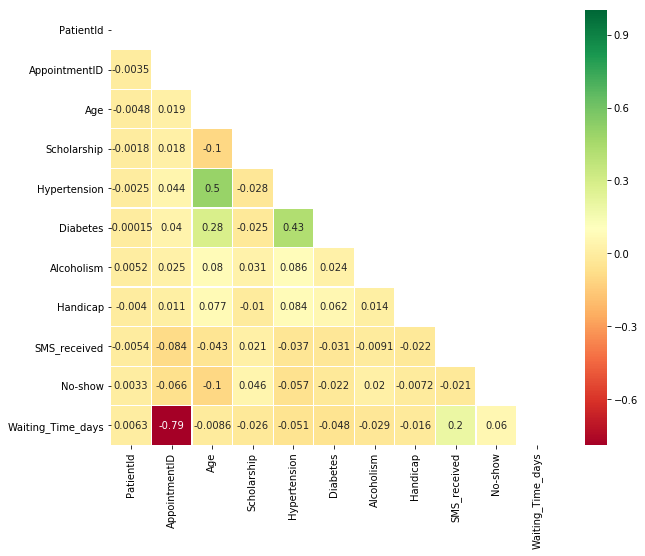

In [44]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,mask=mask) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)

## Reference

Useful Kernal : [Predict Show/NoShow - EDA+Visualization+Model](https://www.kaggle.com/samratp/predict-show-noshow-eda-visualization-model)

If you like my notebook please give a upvote 

Thank you all very much